<a href="https://colab.research.google.com/github/LinaMariaCastro/curso-ia-para-economia/blob/main/clases/4_Aprendizaje_no_supervisado/Taller_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Inteligencia Artificial con Aplicaciones en Economía I**

- 👩‍🏫 **Profesora:** [Lina María Castro](https://www.linkedin.com/in/lina-maria-castro)  
- 📧 **Email:** [lmcastroco@gmail.com](mailto:lmcastroco@gmail.com)  
- 🎓 **Universidad:** Universidad Externado de Colombia - Facultad de Economía

# **Taller: Agrupando Países por su Desarrollo Económico**

**IMPORTANTE**: Guarda una copia de este notebook en tu Google Drive o computador.

**Taller en parejas**

**Nombres estudiantes:**
- Dairon Ferney Reina Sabogal
- Juan Diego Moreno Sánchez

**Forma de entrega**

Jupyter Notebook publicado en su cuenta de Github con el nombre “Taller_Clustering_apellidos_estudiantes.ipynb”.

**Plazo de entrega**

Hoy, 14 de octubre, máximo a las 11:59 p.m., debes enviar link del notebook al correo lina.castro6@uexternado.edu.co, de lo contrario, no será tenido en cuenta.

**Instrucciones Generales**

Completa el código en las celdas marcadas con `### TU CÓDIGO AQUÍ ###`. Puedes añadir más celdas si lo requieres.

**Caso de Estudio: Consultoría para el PNUD**

**Contexto:** El Programa de las Naciones Unidas para el Desarrollo (PNUD) busca optimizar la asignación de recursos y la creación de políticas públicas. En lugar de aplicar
una única estrategia para todos, quieren entender si existen grupos de países con perfiles de desarrollo similares para crear programas de ayuda más efectivos.

**Tu Misión:** Como economista y científico de datos, tu equipo ha sido contratado para analizar un conjunto de datos con indicadores socio-económicos y de salud. Deberás aplicar técnicas de clustering para identificar estos grupos y presentar un perfil detallado de cada uno, junto con una recomendación de política.

## Ejercicio 1: Configuración inicial

1. Importa todas las librerías necesarias

In [1]:
### TU CÓDIGO AQUÍ ###
# Importación de librerías estándar
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importación de modelos y métricas de Scikit-Learn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Configuraciones de visualización
pd.options.display.max_columns = None
pd.options.display.float_format = '{:,.2f}'.format
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

## Ejercicio 2: Carga y Exploración de Datos

1. Carga el dataset 'Country-data.csv'.

In [3]:
### TU CÓDIGO AQUÍ ###
df=pd.read_csv("Country-data.csv")

2. Muestra las 5 primeras filas

In [4]:
print("Primeras filas:")
### TU CÓDIGO AQUÍ ###
df.head()

Primeras filas:


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460
3,Angola,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200


3. Obtén información general del dataset como tipos de datos, número de filas y columnas, cantidad de valores faltantes

In [5]:
print("\nInformación del DataFrame:")
### TU CÓDIGO AQUÍ ###
df.info()


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


4. Obtén las estadísticas descriptivas de las variables del dataset

In [6]:
print("\nEstadísticas Descriptivas:")
### TU CÓDIGO AQUÍ ###
df.describe()


Estadísticas Descriptivas:


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,38.27,41.11,6.82,46.89,"17,144.69",7.78,70.56,2.95,"12,964.16"
std,40.33,27.41,2.75,24.21,"19,278.07",10.57,8.89,1.51,"18,328.70"
min,2.60,0.11,1.81,0.07,609.00,-4.21,32.10,1.15,231.00
25%,8.25,23.80,4.92,30.20,"3,355.00",1.81,65.30,1.79,"1,330.00"
50%,19.30,35.00,6.32,43.30,"9,960.00",5.39,73.10,2.41,"4,660.00"
75%,62.10,51.35,8.60,58.75,"22,800.00",10.75,76.80,3.88,"14,050.00"
max,208.00,200.00,17.90,174.00,"125,000.00",104.00,82.80,7.49,"105,000.00"


5. ¿Hay valores nulos?

No

6. ¿Las escalas de las variables son muy diferentes?

Si, tienen diferentes dimensiones.

7. ¿Qué implicaciones tiene esto para el análisis de clustering?


Que al intentar hacer el clustering el modelo tendra los datos muy alejados entre ellos por las dimensiones son muy distintas, como las exportaciones e inflación.

8. Redacta un análisis de las estadísticas descriptivas

La media de la inflación es del 7.78%, mostrando una inflación moderadamente elevada, mientras que su maximo del 104% para Nigeria, el país que mejor espectativa de vida obtuvo fue Japon con 82.80 años.

## Ejercicio 3: Preprocesamiento de Datos

1. Selecciona solo las variables numéricas para el clustering

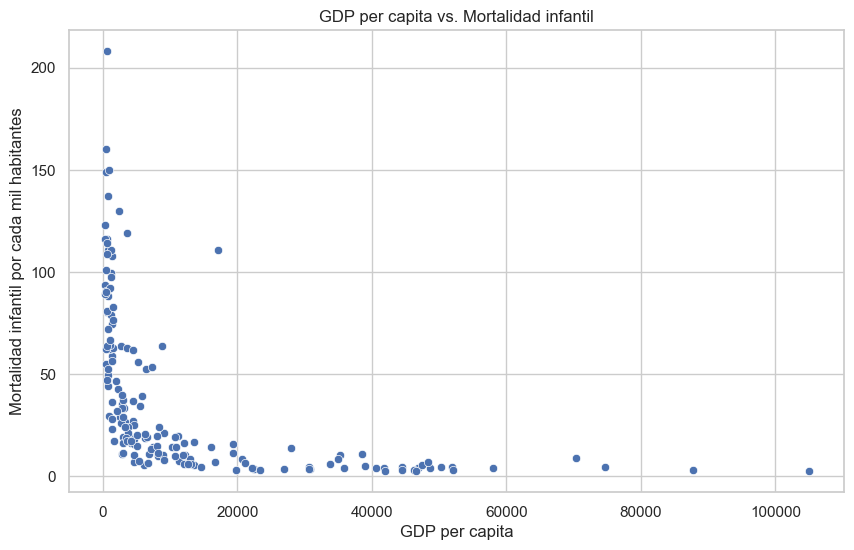

In [7]:
### TU CÓDIGO AQUÍ ###
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdpp', y='child_mort', data=df)
plt.title('GDP per capita vs. Mortalidad infantil')
plt.xlabel('GDP per capita')
plt.ylabel('Mortalidad infantil por cada mil habitantes')
plt.show()

2. Estandariza las variables usando StandardScaler

In [8]:
### TU CÓDIGO AQUÍ ###
X = df[['gdpp', 'child_mort']]

# Estandarizamos las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertimos a DataFrame para facilidad de uso posterior
X_scaled_df = pd.DataFrame(X_scaled, columns=['gdpp', 'child_mort'])
X_scaled_df


,gdpp,child_mort
0,-0.68,1.29
1,-0.49,-0.54
2,-0.47,-0.27
3,-0.52,2.01
4,-0.04,-0.70
...,...,...
162,-0.55,-0.23
163,0.03,-0.53
164,-0.64,-0.37
165,-0.64,0.45


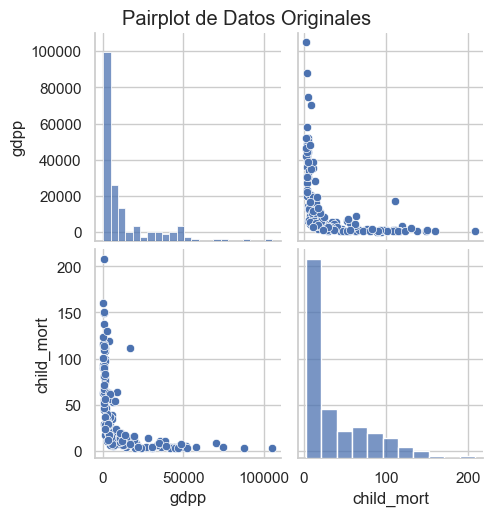

In [9]:
sns.pairplot(X)
plt.suptitle('Pairplot de Datos Originales', y=1.02)
plt.show()

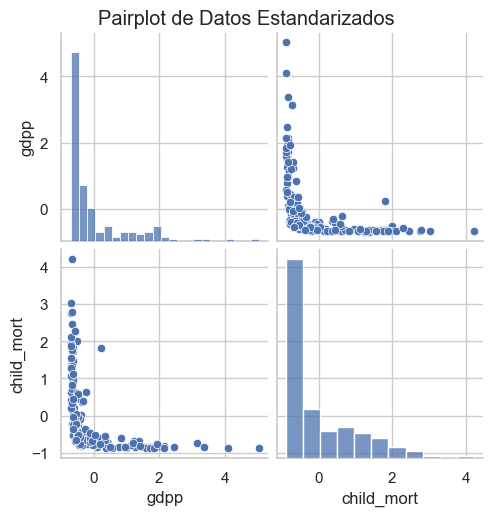

In [10]:
sns.pairplot(X_scaled_df)
plt.suptitle('Pairplot de Datos Estandarizados', y=1.02)
plt.show()

## Ejercicio 4: K-Means Clustering

Usa K-Means para encontrar los clusters. Primero, debes decidir el número óptimo de clusters (k).

1. Usa el Método del Codo para encontrar el k óptimo.
Prueba un rango de k de 1 a 10. Grafica.

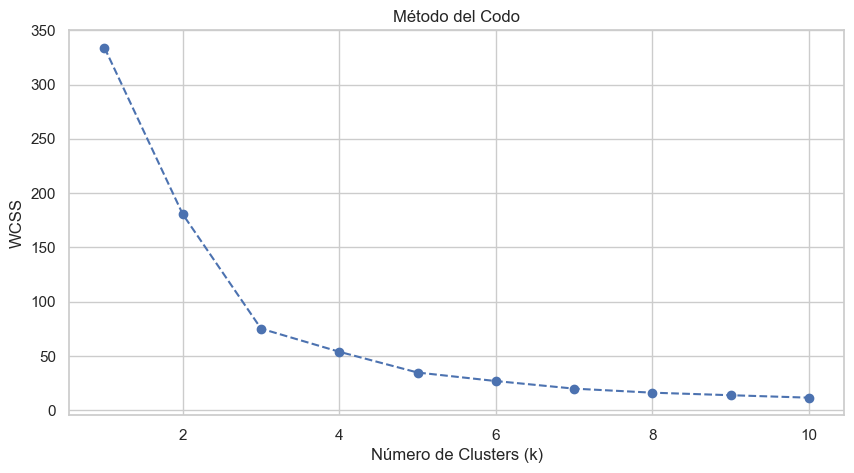

In [12]:
### TU CÓDIGO AQUÍ ###
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.show()

2. ¿Dónde está el "codo"? ¿Qué número de clusters (k) parece ser el más adecuado? Justifiquen su elección.

El codo esta el k = 3 ya que su salto de k = 3 a k = 4 no es tan significativo como el salto de k = 2 a k= 3

3. Calcula y grafica el coeficiente de silueta

Para n_clusters = 2, el coeficiente de silueta promedio es: 0.5267
Para n_clusters = 3, el coeficiente de silueta promedio es: 0.5889
Para n_clusters = 4, el coeficiente de silueta promedio es: 0.5503
Para n_clusters = 5, el coeficiente de silueta promedio es: 0.5653
Para n_clusters = 6, el coeficiente de silueta promedio es: 0.4980
Para n_clusters = 7, el coeficiente de silueta promedio es: 0.5054
Para n_clusters = 8, el coeficiente de silueta promedio es: 0.4776
Para n_clusters = 9, el coeficiente de silueta promedio es: 0.4682
Para n_clusters = 10, el coeficiente de silueta promedio es: 0.4719


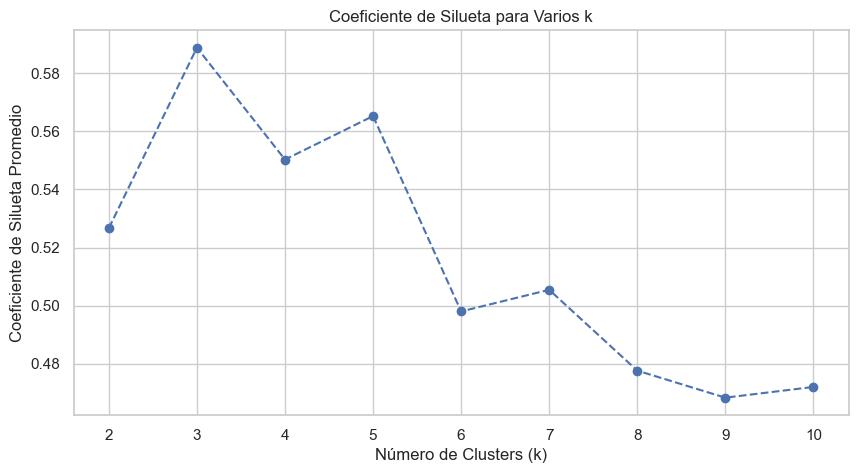

In [13]:
range_n_clusters = range(2, 11)

silhouette_avg_scores = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    cluster_labels = clusterer.fit_predict(X_scaled_df)
    silhouette_avg = silhouette_score(X_scaled_df, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    print(f"Para n_clusters = {n_clusters}, el coeficiente de silueta promedio es: {silhouette_avg:.4f}")

plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o', linestyle='--')
plt.title('Coeficiente de Silueta para Varios k')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficiente de Silueta Promedio')
plt.show()

4. ¿Qué número de clusters (k) parece ser el más adecuado según el coeficiente de silueta? Justifiquen su elección.

El coeficiente de silueta más alto se alcanza para k = 3, lo que indica que este número de clusters resulta en la mejor separación y cohesión de los datos

5. Basados en los resultados del método del codo y el coeficiente de silueta, tomen una decisión de cuántos clusters usar. Justifiquen su elección.

Tomando en cuenta ambas métricas, la elección más adecuada es k = 3, ya que tanto el método del codo como el coeficiente de silueta apuntan a 4 clusters como la opción más efectiva.

6. Aplica K-Means con el k que tu grupo eligió.

In [14]:
### TU CÓDIGO AQUÍ ###
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled_df)
clusters_kmeans

array([3, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 3, 0, 0, 1, 0, 2, 3, 3, 0, 3,
       0, 1, 0, 2, 3, 3, 2, 1, 0, 2, 2, 0, 0, 0, 3, 2, 3, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 3, 0, 0, 1, 1, 3, 3, 0, 1, 3, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 3, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 3, 3, 1, 0, 3, 0, 0, 2,
       3, 0, 0, 1, 0, 3, 3, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 3, 3, 3,
       1, 1, 2, 2, 1, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 3, 0, 0,
       2, 1, 0, 0, 0, 3, 0, 1, 0, 0, 3, 0, 1, 1, 3, 3, 0, 3, 3, 0, 0, 0,
       3, 3, 0, 1, 1, 1, 0, 0, 0, 0, 0, 3, 3], dtype=int32)

7. Añade la asignación de clusters al DataFrame original

In [17]:
### TU CÓDIGO AQUÍ ###
df['Cluster_Kmeans']= clusters_kmeans
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Kmeans
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553,3
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090,0
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460,0
3,Angola,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530,2
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.20,46.60,5.25,52.70,2950,2.62,63.00,3.50,2970,0
163,Venezuela,17.10,28.50,4.91,17.60,16500,45.90,75.40,2.47,13500,0
164,Vietnam,23.30,72.00,6.84,80.20,4490,12.10,73.10,1.95,1310,0
165,Yemen,56.30,30.00,5.18,34.40,4480,23.60,67.50,4.67,1310,3


In [18]:
kmeans.cluster_centers_

array([[-0.24777876, -0.52189472],
       [ 1.94209855, -0.82824808],
       [-0.60978468,  2.15061766],
       [-0.61053985,  0.7268991 ]])

## Ejercicio 5: Análisis e Interpretación de los Clusters

Ahora que tienes los grupos, necesitas entender qué los caracteriza.

1. Calcula el promedio de cada variable para cada cluster.
Esto te dará el "perfil" de cada grupo.

In [19]:
### TU CÓDIGO AQUÍ ###
df.groupby('Cluster_Kmeans')[['child_mort','exports', 'health', 'income', 'inflation', 'life_expec', 'total_fer','gdpp',]].mean()

,child_mort,exports,health,income,inflation,life_expec,total_fer,gdpp
Cluster_Kmeans,,,,,,,,
0,17.29,43.73,6.65,"14,825.12",7.12,73.73,2.21,"8,436.31"
1,4.97,56.58,8.90,"50,225.00",2.94,80.55,1.82,"48,453.57"
2,124.74,32.78,6.02,"3,756.79",14.46,56.03,5.47,"1,821.11"
3,67.50,27.37,6.01,"3,893.72",9.57,63.03,4.21,"1,807.31"


2. Visualiza los resultados. Un scatter plot de 'gdpp' vs 'child_mort' es un buen punto de partida.

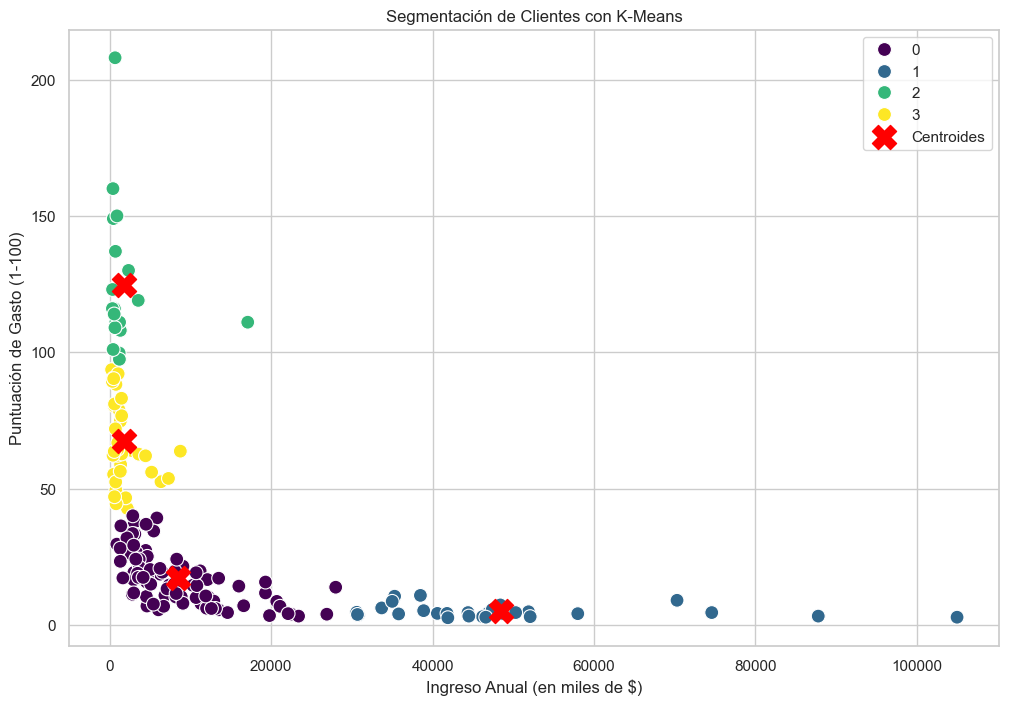

In [20]:
### TU CÓDIGO AQUÍ ###
plt.figure(figsize=(12, 8))
sns.scatterplot(x='gdpp', y='child_mort', hue='Cluster_Kmeans', data=df, palette='viridis', s=100)

# Visualizar los centroides
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroides')

plt.title('Segmentación de Clientes con K-Means')
plt.xlabel('Ingreso Anual (en miles de $)')
plt.ylabel('Puntuación de Gasto (1-100)')
plt.legend()
plt.show()

3. **Nombra los clusters:** Basado en el perfil de cada uno, dale un nombre descriptivo.


- **Cluster 0**:Paises emergentes
- **Cluster 1**:Paises desarrollados
- **Cluster 2**:Paises de bajos ingresos
- **Cluster 3**:Paises en desarrollo

4. **Describe cada cluster:** Para cada grupo, describe sus características principales.


1. **Cluster 0: Paises emergentes**
  - Mortalidad infantil en promedio de (17.29)
  - PIB per capita medio de (8,436.31) y su ingreso promedio es (14,825.12)
  - Exportaciones intermedias (43.37) 
  - Gasto de salud promedio (6.65%) del PIB
  - Inflacion estable (7.12%)
  - Esperanza de vida alta (73.73 años)
  - Tasa de fertilidad baja (2.21 hijos por mujer)
2. **Cluster 1: Paises desarrollados**
  - Mortalidad infantil baja (4.97) y esperanza de vida alta (80.55 años)
  - PIB per capita medio de (48,453.57) y su ingreso promedio es (50,225.00)
  - Exportaciones elevadas (56.58) 
  - Gasto de salud promedio (8.9%) del PIB
  - Baja inflacion (2.94%)
  - Tasa de fertilidad baja (1.82 hijos por mujer)
3. **Cluster 2: Paises de bajos ingresos**
  - Mortalidad infantil muy alta (124.74) y esperanza de vida baja (56.03 años)
  - PIB per capita medio de (1,821.11) y su ingreso promedio es (3,756.79)
  - Exportaciones moderadas (32.78) 
  - Gasto de salud promedio (6.02%) del PIB
  - Inflacion elevada (14.46%)
  - Alta tasa de fertilidad (5.47 hijos por mujer)
4. **Cluster 3: Paises en desarrollo**
  - Mortalidad infantil moderadamente alta (67.50) y esperanza de vida moderada (63.03 años)
  - PIB per capita medio de (1,807.31) y su ingreso promedio es (3,893.72)
  - Exportaciones bajas (27.37)
  - Gasto de salud promedio (6.01%) del PIB
  - Inflacion media-alta (9.57%)
  - Tasa de fertilidad moderadamente elevada (4.21 hijos por mujer)


5. **Recomendación de Política:** Elije un cluster y propón un tipo de programa de ayuda o política pública que el PNUD podría implementar para ellos.

**Paises en desarrollo**

Los países en desarrollo suelen poseer una inflación moderadamente alta, lo que implica que las personas no posean en todo momento la capacidad de adquirir los bienes básicos para vivir dignamente. Para estos países se les recomendaría implementar políticas para que la política monetaria sea más efectiva, como la confianza en los bancos centrales o el control de la emisión del papel moneda.

Ahora bien, estos países también poseen una tasa de mortalidad infantil moderadamente elevada y una esperanza de vida en promedio alta, pero que aún no alcanza a llegar a esperanzas de vida al nivel de países desarrollados. Esto se puede explicar por la brecha en los esfuerzos del gasto en salud respecto al PIB, donde los países en desarrollo tienen un gasto promedio del 6.01%, mientras que los países que ya están desarrollados poseen un gasto promedio de alrededor de 8.9% del PIB. La política podría ser el reforzamiento de los sistemas de salud regionales, que suelen ser los más desfinanciados, y así atacar la mortalidad infantil, también del desarrollo.

Además, estos países en desarrollo poseen un PIB per cápita medio de 1.807, lo que nos muestra que es un PIB muy bajo en comparación a los países desarrollados, con un PIB per cápita promedio de 48.453. Una política pública para el incentivo del crecimiento económico es el incentivo a la creación de empresas y a la innovación tecnológica, así intentando que al menos en las ciudades se cree más capital, y, mediante medidas redistributivas, como el gasto en salud de las regiones, se puedan mejorar las condiciones de las regiones.

